In [32]:
import os
import glob

import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
df_occurence = pd.read_csv("../dataset/combined/occurences.csv", parse_dates=["ts"])
df_occurence = gpd.GeoDataFrame(df_occurence, geometry=gpd.points_from_xy(df_occurence["longitude"], df_occurence["latitude"]), crs="EPSG:4326")
df_occurence["ts_y"] = df_occurence["ts"].dt.year
df_occurence["ts_m"] = df_occurence["ts"].dt.month
df_occurence["ts_ym"] = df_occurence["ts"].dt.strftime('%Y-%m')

df_occurence.head()

,occurrenceID,ts,latitude,longitude,species,geometry,ts_y,ts_m,ts_ym
0,409742,2023-11-30,-25.363597,46.837436,Megaptera novaeangliae,POINT (46.83744 -25.3636),2023,11,2023-11
1,403039,2023-11-21,-21.220602,55.205602,Megaptera novaeangliae,POINT (55.2056 -21.2206),2023,11,2023-11
2,405925,2023-11-19,-33.476485,115.064949,Megaptera novaeangliae,POINT (115.06495 -33.47648),2023,11,2023-11
3,403038,2023-11-14,-21.235409,55.226194,Megaptera novaeangliae,POINT (55.22619 -21.23541),2023,11,2023-11
4,403037,2023-11-13,-21.269454,55.201475,Megaptera novaeangliae,POINT (55.20148 -21.26945),2023,11,2023-11


<Axes: xlabel='ts_y'>

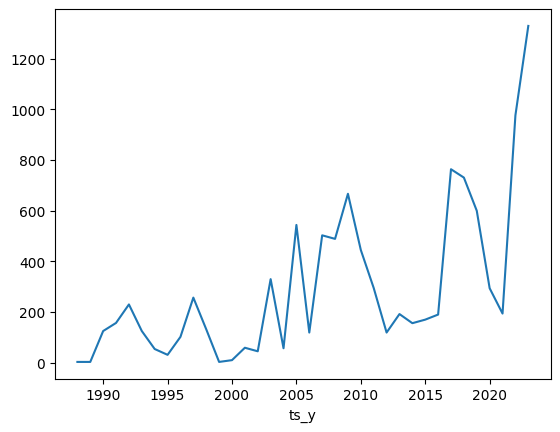

In [11]:
df_occurence["ts_y"].value_counts().sort_index(ascending=False).plot()

In [24]:
df_occurence["ts_y"].value_counts().sort_index(ascending=False)

ts_y
2023    1330
2022     977
2021     194
2020     294
2019     600
2018     731
2017     764
2016     190
2015     170
2014     156
2013     192
2012     119
2011     295
2010     445
2009     667
2008     489
2007     503
2006     119
2005     544
2004      57
2003     330
2002      45
2001      59
2000      10
1999       3
1998     132
1997     257
1996     102
1995      31
1994      54
1993     125
1992     230
1991     157
1990     125
1989       3
1988       3
Name: count, dtype: int64

<Axes: xlabel='ts_y,ts_m'>

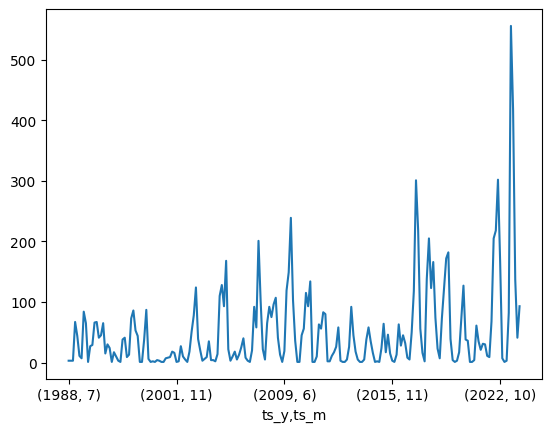

In [12]:
df_occurence.groupby(["ts_y", "ts_m"]).count()["occurrenceID"].plot()
# df_occurence

In [5]:
dd = df_occurence.groupby(["ts_y", "ts_m"]).count()["occurrenceID"].reset_index()
dd

,ts_y,ts_m,occurrenceID
0,1988,7,3
1,1989,7,3
2,1990,7,3
3,1990,8,67
4,1990,9,44
...,...,...,...
205,2023,7,556
206,2023,8,418
207,2023,9,137
208,2023,10,41


<Axes: xlabel='ts_m', ylabel='occurrenceID'>

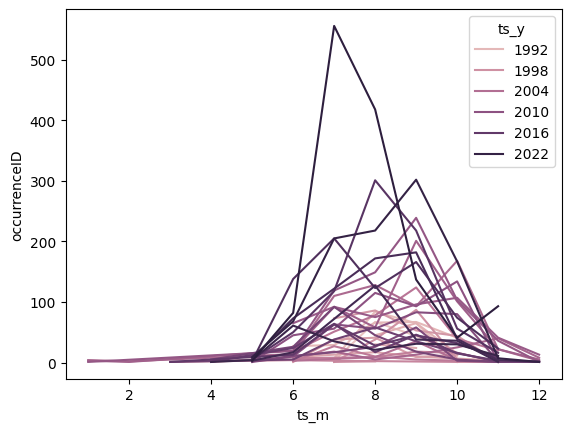

In [6]:
sns.lineplot(dd, x="ts_m", y="occurrenceID", hue="ts_y")

<Axes: xlabel='ts_m', ylabel='occurrenceID'>

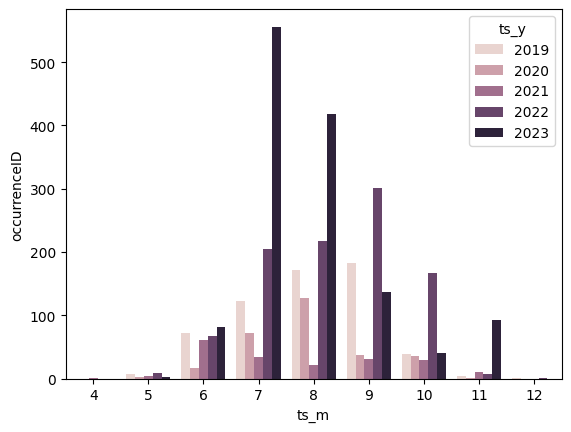

In [22]:
sns.barplot(dd[dd["ts_y"] > 2018], x="ts_m", y="occurrenceID", hue="ts_y")

<Axes: xlabel='ts_y', ylabel='ts_m'>

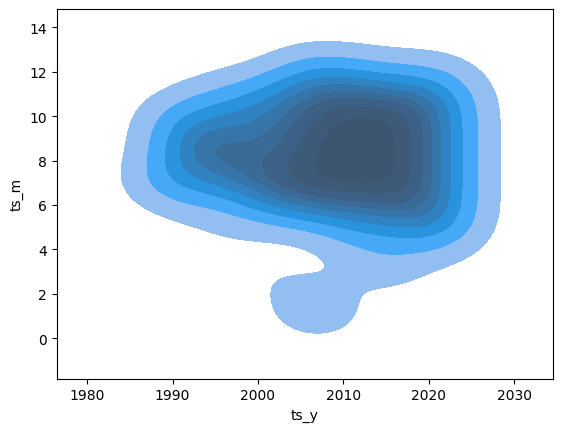

In [23]:
sns.kdeplot(data=dd, x="ts_y", y="ts_m", fill=True)

## Spatial Plots

In [31]:
gpd_geom = gpd.read_file("../dataset/africa/shp/grid-sea-africa-zoned.shp")
gpd_geom.head()

,id,left,top,right,bottom,row_index,col_index,MINX,MINY,MAXX,MAXY,CNTX,CNTY,AREA,PERIM,HEIGHT,WIDTH,ZONE_ID,geometry
0,110.0,18.614758,-34.063676,18.914758,-34.363676,109.0,0.0,20.614758,-34.461992,57.770783,-3.363676,39.19277,-18.912834,1155.489807,136.508682,31.098316,37.156025,1,"MULTIPOLYGON (((18.91476 -34.36368, 18.89379 -..."
1,111.0,18.614758,-34.363676,18.914758,-34.663676,110.0,0.0,20.614758,-34.461992,57.770783,-3.363676,39.19277,-18.912834,1155.489807,136.508682,31.098316,37.156025,2,"POLYGON ((18.80851 -34.36368, 18.81972 -34.378..."
2,112.0,18.614758,-34.663676,18.914758,-34.963676,111.0,0.0,20.614758,-34.461992,57.770783,-3.363676,39.19277,-18.912834,1155.489807,136.508682,31.098316,37.156025,3,"POLYGON ((18.91476 -34.66368, 18.91476 -34.963..."
3,113.0,18.614758,-34.963676,18.914758,-35.263676,112.0,0.0,20.614758,-34.461992,57.770783,-3.363676,39.19277,-18.912834,1155.489807,136.508682,31.098316,37.156025,4,"POLYGON ((18.91476 -34.96368, 18.91476 -35.263..."
4,114.0,18.614758,-35.263676,18.914758,-35.563676,113.0,0.0,20.614758,-34.461992,57.770783,-3.363676,39.19277,-18.912834,1155.489807,136.508682,31.098316,37.156025,5,"POLYGON ((18.91476 -35.26368, 18.91476 -35.563..."


In [29]:
df_vis = df_occurence[df_occurence["longitude"] < 60]
df_vis.head()

,occurrenceID,ts,latitude,longitude,species,geometry,ts_y,ts_m,ts_ym
0,409742,2023-11-30,-25.363597,46.837436,Megaptera novaeangliae,POINT (46.83744 -25.3636),2023,11,2023-11
1,403039,2023-11-21,-21.220602,55.205602,Megaptera novaeangliae,POINT (55.2056 -21.2206),2023,11,2023-11
3,403038,2023-11-14,-21.235409,55.226194,Megaptera novaeangliae,POINT (55.22619 -21.23541),2023,11,2023-11
4,403037,2023-11-13,-21.269454,55.201475,Megaptera novaeangliae,POINT (55.20148 -21.26945),2023,11,2023-11
5,403035,2023-11-08,-21.198070,55.195273,Megaptera novaeangliae,POINT (55.19527 -21.19807),2023,11,2023-11


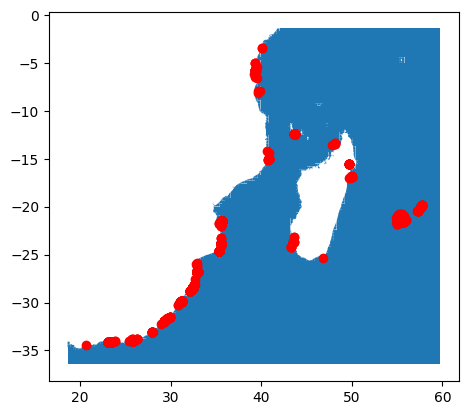

In [30]:
# plot
fig, ax = plt.subplots()

gpd_geom.plot(ax=ax)
df_vis.plot(ax=ax, color="red")

plt.show()

In [41]:
for i, tsym in enumerate(df_vis["ts_ym"].unique()):
    fig, ax = plt.subplots()

    gpd_geom.plot(ax=ax)
    df_vis[df_vis["ts_ym"] == tsym].plot(ax=ax, color="red")
    ax.set_title(tsym)

    fig.savefig(f"anim/{i}-{tsym}.png")
    plt.close(fig)

In [54]:
files = glob.glob("./anim/*.png")
sorted_files = []

files_split = [s.split("/")[-1].split("-") for s in files]
parsed_files = [(int(s[0]), int(s[1]), int(s[2][:2])) for s in files_split]
sorted_files = list(sorted(parsed_files, key=lambda x: (x[1], x[2])))

with open("list.txt", "w") as f:
    for entry in sorted_files:
        f.write(f"file 'anim/{entry[0]}-{entry[1]}-{entry[2]}.png'\n")

In [53]:
import subprocess

In [ ]:
subprocess.call(
    [
        '/usr/bin/ffmpeg', 
        '-f',
        'concat',
        '-i',
        'list.txt',
        '-pix_fmt',
        'yuv420p',
        '-movflags',
        '+faststart',
        'mapp.mp4',
        '-y'
    ])